In [2]:
import pandas as pd

###`Q-1:` Write a program to create an empty series.

In [3]:
# code here
pd.Series([])

<ipython-input-3-cc37f99e5165>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series([])


Series([], dtype: float64)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [8]:
# code herea
a=pd.Series([1,2,3,4])
b=pd.Series([5,6,7,8])

In [9]:
a+b

0     6
1     8
2    10
3    12
dtype: int64

In [10]:
a*b

0     5
1    12
2    21
3    32
dtype: int64

###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [28]:
# code here
a=pd.Series([2, 4, 6, 8, 10])
b=pd.Series([1, 3, 5, 7, 10])
print(a==b)
print(a>=b)
print(a<b)

0    False
1    False
2    False
3    False
4     True
dtype: bool
0    True
1    True
2    True
3    True
4    True
dtype: bool
0    False
1    False
2    False
3    False
4    False
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [30]:
# code here
def change_dtype(series):
  return pd.to_numeric(series,errors='coerce')

series=pd.Series([1,2,'Python',2.0,True])
change_dtype(series)

0    1.0
1    2.0
2    NaN
3    2.0
4    1.0
dtype: float64

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

###`Q-6` Find top 10 most run getter from the series.

In [15]:
# code here
match=pd.read_csv('/content/batsman_runs_series.csv',index_col='batter')
match

,batsman_run
batter,
A Ashish Reddy,280
A Badoni,161
A Chandila,4
A Chopra,53
A Choudhary,25
...,...
Yash Dayal,0
Yashpal Singh,47
Younis Khan,3


In [32]:
match.sort_values('batsman_run',ascending=False).head(10)

,batsman_run
batter,
V Kohli,6634
S Dhawan,6244
DA Warner,5883
RG Sharma,5881
SK Raina,5536
AB de Villiers,5181
CH Gayle,4997
MS Dhoni,4978
RV Uthappa,4954


###`Q-7` No of players having runs above 3000

In [34]:
# code here
match[match['batsman_run']>3000]

,batsman_run
batter,
AB de Villiers,5181
AM Rahane,4074
AT Rayudu,4190
CH Gayle,4997
DA Warner,5883
F du Plessis,3403
G Gambhir,4217
KA Pollard,3437
KD Karthik,4377


In [43]:
match[match['batsman_run']>3000].shape[0]

20

###`Q-8` No of players having runs above mean value?

In [40]:
# code here
match[match['batsman_run']>match['batsman_run'].mean()].count()

batsman_run    128
dtype: int64

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9` 
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [48]:
# code here
items=pd.read_csv('/content/items.csv',squeeze=True,index_col='item_name')
items

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object

In [58]:
#2
items[items.isna()].shape[0]

50

In [65]:
#3 dollar to ruppess
def rup(x):
    try:
        y=x[1:]
    except:
          y=x
    return float(y)*82.65
ruppess=items.apply(rup)
ruppess

item_name
Chips and Fresh Tomato Salsa              197.5335
Izze                                      280.1835
Nantucket Nectar                          280.1835
Chips and Tomatillo-Green Chili Salsa     197.5335
Chicken Bowl                             1403.3970
                                           ...    
Steak Burrito                             971.1375
Steak Burrito                             971.1375
Chicken Salad Bowl                        929.8125
Chicken Salad Bowl                        723.1875
Chicken Salad Bowl                        723.1875
Name: item_price, Length: 4622, dtype: float64

In [59]:
items.isna().sum()

50

In [69]:
#Null Values with mean
ruppess.fillna(ruppess.mean())

item_name
Chips and Fresh Tomato Salsa              197.5335
Izze                                      280.1835
Nantucket Nectar                          280.1835
Chips and Tomatillo-Green Chili Salsa     197.5335
Chicken Bowl                             1403.3970
                                           ...    
Steak Burrito                             971.1375
Steak Burrito                             971.1375
Chicken Salad Bowl                        929.8125
Chicken Salad Bowl                        723.1875
Chicken Salad Bowl                        723.1875
Name: item_price, Length: 4622, dtype: float64

###`Q-10`: 
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [70]:
# code here
#i. Find mean price
ruppess.mean()

616.8195531496063

In [73]:
 #30 and  6quantile
 ruppess.quantile(q=0.3)

367.7925

In [74]:
ruppess.quantile(q=0.06)

103.3125

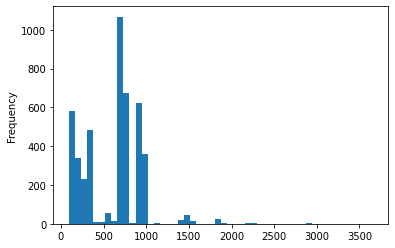

In [75]:
#  iii. Plot Histogram on price with bin size 50
ruppess.plot.hist(bins=50)